## Reference:
1. https://github.com/locationtech/jts/blob/master/modules/core/src/main/java/org/locationtech/jts/triangulate/quadedge/QuadEdge.java

In [591]:
class Site:
    def __init__(self,x,y):
        self.x = x
        self.y = y
    
    def equal(self,other):
        return self.x == other.x and self.y == other.y
    
    def plus(self,other):
        x = self.x + other.x
        y = self.y + other.y
        return Site(x,y)
    
    def minus(self,other):
        x = self.x - other.x
        y = self.y - other.y
        return Site(x,y)
    
    def divide_scalar(self,k):
        x = self.x / k
        y = self.y / k
        return Site(x,y)
    
    def mid(self,other):
        s = self.plus(other)
        s = s.divide_scalar(2)
        return s

    def minus(self,other):
        x = self.x - other.x
        y = self.y - other.y
        return Site(x,y)
    
    def debug(self):
        print(f"(x,y): ({self.x},{self.y})")
    
    def getXY(self):
        return (self.x,self.y)

In [592]:
#p.107 - InCircleTest
import numpy as np
def det2(p1,p2):
    x1,y1 = p1
    x2,y2 = p2
    return x1*y2 - x2*y1

def det3(p1,p2,p3):
    x1,y1,z1 = p1
    x2,y2,z2 = p2
    x3,y3,z3 = p3
    det = x1*det2((y2,z2),(y3,z3)) - y1*det2((x2,z2),(x3,z3)) + z1*det2((x2,y2),(x3,y3))
    #print(f"det3: {det}")
    return det

def det4(p1,p2,p3,p4):
    x1,y1,z1,h1 = p1
    x2,y2,z2,h2 = p2
    x3,y3,z3,h3 = p3
    x4,y4,z4,h4 = p4
    detN = x1*det3((y2,z2,h2),(y3,z3,h3),(y4,z4,h4)) - y1*det3((x2,z2,h2),(x3,z3,h3),(x4,z4,h4))
    detM = z1*det3((x2,y2,h2),(x3,y3,h3),(x4,y4,h4)) - h1*det3((x2,y2,z2),(x3,y3,z3),(x4,y4,z4))
    return detN + detM

def ccw(s1,s2,s3):
    #Calculate normaly
    xa,ya = s1.x,s1.y
    xb,yb = s2.x,s2.y
    xc,yc = s3.x,s3.y
    detT = det3((xa,ya,1),(xb,yb,1),(xc,yc,1)) 
    detN = xa*(yb-yc) - ya*(xb-xc) + (xb*yc-xc*yb)
    #print(f"detT: {detT}")
    #print(f"detT: {detN}")

    #TODO: remove after done
    # calculate with numpy
    matrix = np.array([[xa,ya,1],[xb,yb,1],[xc,yc,1]])
    detM = np.linalg.det(matrix)
    #print(f"detN: {detN}")
    #print(f"detM: {detM}")
    assert(detM == detN)

    return detT > 0

def create_4D(s):
    x,y = s.x,s.y
    return [x,y,x*x+y*y,1]

def in_circle(s1,s2,s3,s4):
    p1 = create_4D(s1)
    p2 = create_4D(s2)
    p3 = create_4D(s3)
    p4 = create_4D(s4)
    # print(f"p1: {p1}")
    # print(f"p2: {p2}")
    # print(f"p3: {p3}")
    # print(f"p4: {p4}")

    detN = det4(p1,p2,p3,p4)

    #TODO: remove after done
    # calculate with numpy
    matrix = np.array([p1,p2,p3,p4])
    detM = np.linalg.det(matrix)
    #print(f"detN4: {detN}")
    #print(f"detM4: {detM}")
    assert(round(detN,0) == round(detM,0))
    return detN > 0

def test_ccw(data,expect,func,msg=""):
    print(f"{msg}")
    result = func(*data)
    assert(expect == result)

# Test case
s1 = Site(0,0)
s2 = Site (1,1)
s3 = Site (0,1)
test_ccw([s1,s2,s3],expect=True,func=ccw,msg="Test s1,s2,s3 - Expect counter clockwise")
test_ccw([s1,s3,s2],expect=False,func=ccw,msg="Test s1,s3,s2 - Expect clockwise")

test_ccw([s2,s3,s1],expect=True,func=ccw,msg="Test s2,s3,s1 - Expect counter  clockwise")
test_ccw([s2,s1,s3],expect=False,func=ccw,msg="Test s2,s1,s3 - Expect clockwise")

test_ccw([s3,s1,s2],expect=True,func=ccw,msg="Test s3,s1,s2 - Expect counter clockwise")
test_ccw([s3,s2,s1],expect=False,func=ccw,msg="Test s3,s2,s1 - Expect clockwise")


Test s1,s2,s3 - Expect counter clockwise
Test s1,s3,s2 - Expect clockwise
Test s2,s3,s1 - Expect counter  clockwise
Test s2,s1,s3 - Expect clockwise
Test s3,s1,s2 - Expect counter clockwise
Test s3,s2,s1 - Expect clockwise


In [593]:
# Incircle test case
def test_incircle(data,expect,func,msg=""):
    print(f"{msg}")
    result = func(*data)
    assert(expect == result)
s1 = Site(0,0)
s2 = Site(1,1)
s3 = Site(1,0)
s4 = Site(0,1)
test_incircle([s1,s2,s3,s4],expect=False,func=in_circle,msg="epxect 4 points are cocircular")
test_incircle([s2,s3,s4,s1],expect=False,func=in_circle,msg="epxect 4 points are cocircular")
test_incircle([s3,s4,s1,s2],expect=False,func=in_circle,msg="epxect 4 points are cocircular")
test_incircle([s4,s1,s2,s3],expect=False,func=in_circle,msg="epxect 4 points are cocircular")

s1 = Site(0,0)
s2 = Site(1,0)
s3 = Site(1,1)
s4 = Site(0,5)
test_incircle([s1,s2,s3,s4],expect=False,func=in_circle,msg="epxect s4 is not in circle")
test_incircle([s2,s3,s4,s1],expect=True,func=in_circle,msg="epxect s1 is in circle and to the left of triangle s2s3s4")
test_incircle([s3,s4,s1,s2],expect=False,func=in_circle,msg="epxect s2 is right of triangle s3s4s1")
test_incircle([s4,s1,s2,s3],expect=True,func=in_circle,msg="epxect s3 is right of triangle s4s1s2")


epxect 4 points are cocircular
epxect 4 points are cocircular
epxect 4 points are cocircular
epxect 4 points are cocircular
epxect s4 is not in circle
epxect s1 is in circle and to the left of triangle s2s3s4
epxect s2 is right of triangle s3s4s1
epxect s3 is right of triangle s4s1s2


In [594]:
# is used to reprenset a subdivision S 
'''
p.92

The group of edges containing e is represented in the data structure by one
edge record e, divided into four parts e [0] through e [3]. Part e [r] corresponds
to the edge e. Rot’. See Figure 7a. A generic edge e = e. Rot’Flipf is represented
by the triplet (e r, f ), called an edge reference. We may think of this triplet as a
pointer to the “quarter-record” e[r] plus a bit f that tells whether we should look
at it from “above” or from “below.”
Each part e [r] of an edge record contains two fields, Data and Next. The
Data field is used to hold geometrical and other nontopological information
about the edge e. Rot’. This field neither affects nor is affected by the topological
operations that we will describe, so its contents and format are entirely dependent
on the application.

The Next field of e [r] contains a reference to the edge e0Rot(r)Onext. Given an
arbitrary edge reference (e, r, f ), the three basic edge functions Rot, Flip, and
Onext are given by the formulas

The quad-edge data structure contains no separate records for vertice or faces;
a vertex is implicitly defined as a ring of edges, and the standard
way to refer to it is to specify one of its outgoing edges.

The standard way of referring to a connected component of the edge structure 
is by giving one of its directed edges.
'''

class QuadEdge:
    name_id = 1
    def __init__(self):
        self.Name = QuadEdge.name_id
        QuadEdge.name_id += 1
        self.next = self
        self.rot = None
        self.org = None
        self.dest = None
        #self.Sym = self - not making any sense at the moment?
        # Lnext = Rnext = Sym ? are they pointing to self? 
       # self.Lnext = self # p.84 = eRotInverse.Onext.Rot
        #self.Rnext = self # p.84 = eRot.Onext.RotInverse
        #self.Dnext = self # p.84 = eSym.Onext.Sym
        #self.Oprev = self # p.84 = eRot.Onext.Rot
        #self.Lprev = self # p.84 = eRot.Onext.Sy,
       # self.Rprev = self # p.84 = eRot.Sym.Onext
       # self.Dprev = self # p.84 = eRot.RotInverse.Onext.RotInverse
       # self.Left = self # p.85 = eRotInverse.Org
        #self.Right = self # p.85 = eRotInverse.Org
        #self.Org = None # p.85 an edge algebra as the orbit of e under Onext, that is the cyclic sequence of edges
        # orbit: <..., e, eOnext, eOnext2,...,eOnext-1,e,...>
       # self.Dest = None # p.85 = e.Sym.Org
        
       # self.Edges = [Edge(self.Org,self.Dest,self)]*4
        #self.edge_index = 0
       # self.active = True

    
    @staticmethod
    def Make_Edge(a, b):
        print(f"\Make_Edge - create edge: {QuadEdge.name_id} ")
        quad_edges = []
        for _ in range(4):
            new_qe = QuadEdge()
            new_qe.org = a
            new_qe.dest = b
            quad_edges.append(new_qe)
            
        quad_edges[0].rot = quad_edges[1]
        quad_edges[1].rot = quad_edges[2]
        quad_edges[2].rot = quad_edges[3]
        quad_edges[3].rot = quad_edges[0]

        # Why is this the case?
        # Why intialize like this?
        quad_edges[0].next = quad_edges[0]
        quad_edges[1].next = quad_edges[3]
        quad_edges[2].next = quad_edges[2]
        quad_edges[3].next = quad_edges[1]

        # base = QuadEdge()
        # base.rot = quad_edges[1]
        # base.next = quad_edges[0]
        # base.org = a
        # base.dest = b
        # base.org = a
        # base.dest = b
        # print(f"org: {base.org}")
        # print(f"dest: {base.dest}")

        return quad_edges[0]

    '''
    Splice[a, b] and takes as parameters two
    edges a and b, returning no value. 
    This operation affects the two edge rings a Org
    and b Org and, independently, the two edge rings a Left and b Left. In each case,
    (a) if the two rings are distinct, Splice will combine them into one;
    (b) if the two are exactly the same ring, Splice will break it in two separate
    pieces;
    (c) if the two are the same ring taken with opposite orientations, Splice will
    Flip (and reverse the order) of a segment of that ring.

    The parameters a and b determine the place where the edge rings will be cut
    and joined. For the rings a Org and b Org, the cuts will occur immediately after a
    and b (in counterclockwise order); for the rings aLeft and bLeft, the cut will
    occur immediately before a Rot and b Rot.
    '''
    @staticmethod
    def Splice(a,b):
        print("\n---BEGIN SPLICE---")
        alpha = a.Onext().Rot() # Onext(a).Rot() --> return the underlying edge
        beta = b.Onext().Rot() # Onext(a).Rot()--> return the underlying edge
        #Ref: L.Guibas and J. Stolfi, p.102
        #precompute right hand side
        bOnext = b.Onext() # QuadEdge
        aOnext = a.Onext() # QuadEdge
        betaOnext = beta.Onext() # QuadEdge
        alphaOnext = alpha.Onext() # QuadEdge
        # assign to the left hand
        # print("\n---Before update---")
        # print(f"bOnext: {bOnext.Name}")
        # print(f"aOnext: {aOnext.Name}")
        # print(f"betaOnext: {betaOnext.Name}")
        # print(f"alphaOnext: {alphaOnext.Name}")

        a.next = bOnext
        b.next = aOnext
        alpha.next = betaOnext
        beta.next = alphaOnext

        # print("\n---After update---")
        # print(f"bOnext: {b.Onext().Name}")
        # print(f"aOnext: {a.Onext().Name}")
        # print(f"betaOnext: {beta.Onext().Name}")
        # print(f"alphaOnext: {alpha.Onext().Name}")
        # print("\n---END SPLICE---")
        return None
    
    '''
    The operation Connett[a, b] will add a new edge e 
    connecting the destination of a to the origin of
    b, in such a way that a Left = e Left = b Left after the connection is complete. 
    For added convenience it will also set the Org and Dest fields of the new edge to
    a.Dest and b.Org, respectively.
    '''
    @staticmethod
    def Connect(a,b):
        print(f"\Connect - will create edge: {QuadEdge.name_id} ")
        e = QuadEdge.Make_Edge(a.Dest(),b.Org())
        QuadEdge.Splice(e, a.Lnext())
        QuadEdge.Splice(e.Sym(), b)
        return e
        
    def Org(self):
        return self.org
    
    def Dest(self):
        return self.dest
    
    # What do we return after Rot? self?
    def Rot(self):
        return self.rot
    
    def Sym(self):
        return self.rot.rot
    
    def RotInverse(self):
        return self.rot.Sym()

    def Lnext(self):
        return self.RotInverse().Onext().Rot()

    def Lprev(self):
        return self.next.Sym()
    
    def Rnext(self):
        return self.rot.next.RotInverse()
    
    def Rprev(self):
        return self.Sym().Onext()
    
    def Onext(self):
        return self.next
    
    def Oprev(self):
        return self.rot.next.rot
    
    def Dnext(self):
        return self.Sym().Onext().Sym()
    
    def Dprev(self):
        return self.RotInverse().Onext().RotInverse()
    
    # Deactivate the edge but not actually delete it
    def Delete(self):
        self.active = False

In [595]:
#Helper function
'''
X: point (site)
e: edge
'''
def left_of(X,e):
    return ccw(X,e.Org(),e.Dest())

def right_of(X,e):
    return ccw(X,e.Dest(),e.Org())

def valid(e, basel):
    return right_of(e.Dest(),basel)

# Check the delete_edge - does it only disconnect but not actually delete anything
def delete_edge(e):
    QuadEdge.Splice(e, e.Oprev())
    QuadEdge.Splice(e.Sym(), e.Sym().Oprev())


In [596]:
# Test case for left_of
# Test case for right_of
# Test case for valid

In [597]:
#Divide and conquer
def delaunay_dc(S,edge_store = []):
    length_S = len(S)
    if length_S == 2:
        s1,s2 = S[0],S[1]
        a = QuadEdge.Make_Edge(s1,s2)
        edge_store.append(a)
        #How do we return two edges if we only make one quad edge?
        # Which one is edge, which one is quad edge? Are they all edges only, or they are all quad edge
        return (a,a.Sym())
    elif length_S == 3:
        s1,s2,s3 = S[0],S[1],S[2]
        # Create edges a connecting s1 to s2 
        # and b connecting s2 to s3
        a = QuadEdge.Make_Edge(s1,s2)
        b = QuadEdge.Make_Edge(s2,s3)
        edge_store.append(a)
        edge_store.append(b)
        #print("\nsplice(a.Sym(),b)")
        QuadEdge.Splice(a.Sym(),b)
        #Close the triangle
        if ccw(s1,s2,s3):
            #print("\nccw(s1,s2,s3)")
            #print("connect(b,a)")
            c = QuadEdge.Connect(b,a)
            edge_store.append(c)
            return (a,b.Sym())
        elif ccw(s1,s3,s2):
            #print("\nccw(s1,s3,s2)")
            #print("connect(b,a)")
            c = QuadEdge.Connect(b,a)
            edge_store.append(c)
            return (c.Sym(),c)
        else:
            print("the three points are collinear")
            return (a,b.Sym())
    elif length_S >= 4:
        L,R = S[:length_S//2],S[length_S//2:]
        ldo,ldi = delaunay_dc(L,edge_store)
        rdi,rdo = delaunay_dc(R,edge_store)
        #Compute the lower common tangent of L and R
        max_loop = 10
        counter = 0
        while rdi != None and ldi != None:
            print(f"ldi:")
            print(f"ldi: {ldi.Org().debug()}")
            print(f"rdi: {rdi.Org().debug()}")

            if left_of(rdi.Org(),ldi):
                ldi = ldi.Lnext()
            elif right_of(ldi.Org(),rdi):
                rdi = rdi.Rprev()
            else:
                print("Finish compute the lower common tangent of L and R")
                break
            counter += 1
            if counter > max_loop:
                print("Stuck in the loop")
                return None
        #Create a first cross edge basel from rdi.Org to ldi.Org
        basel = QuadEdge.Connect(rdi.Sym(),ldi)
        edge_store.append(basel)
        if ldi.Org() == ldo.Org():
            ldo = basel.Sym()
        if rdi.Org() == rdo.Org():
            rdo = basel
        #Merge loop
        while True:
            #Locate the first L point (lcand.Dest) to be encoutered by the rising bubble
            #and delete Ledges out of basel.Dest that fail the circle test
            lcand = basel.Sym().Onext()
            lcand_valid = valid(lcand,basel)
            if lcand_valid:
                while in_circle(basel.Dest(), basel.Org(), lcand.Dest(), lcand.Onext().Dest()):
                    lcandNext = lcand.Onext()
                    delete_edge(lcand)
                    lcand = lcandNext
            #End if
            #Symmetrically locate the first R point to be hit, and delete R edges
            rcand = basel.Oprev()
            rcand_valid = valid(rcand, basel)
            if valid(rcand,basel):
                while in_circle(basel.Dest(), basel.Org(), rcand.Dest(), rcand.Oprev().Dest()):
                    rcandPrev = rcand.Oprev()
                    delete_edge(rcand)
                    rcand = rcandPrev
            #End if
            #If both lcand and rcand are invalid, then basel is the upper common tangent
            if not lcand_valid and not rcand_valid:
                print("Both lcand and rcand are invalid")
                break
            #if both are valid, then choose the approriate one using the incircle test
            if not lcand_valid or (rcand_valid and in_circle(lcand.Dest(), lcand.Org(), rcand.Org(), rcand.Dest())):
                print("add cross edge basel from rcand.Dest to basel.Dest")
                basel = QuadEdge.Connect(rcand, basel.Sym())
                edge_store.append(basel)
            else:
                print("add cross edge basel from basel.Org to lcand.Dest")
                basel = QuadEdge.Connect(basel.Sym(), lcand.Sym())
                edge_store.append(basel)
            #end if
        #End loop
        return (ldo, rdo)
    #End delaunay_dc 


In [598]:
def prepare_data(S):
    if len(S) < 2:
        return S
    #1. Sort by x
    #2. Sort by y
    sorted_y = sorted(S, key = lambda s: s.y)
    sorted_xy = sorted(sorted_y, key = lambda s: s.x)
    
    #3. Remove duplicate points
    i = 0
    while i < len(sorted_xy)-1:
        if sorted_xy[i].equal(sorted_xy[i+1]):
            #delete i+1
            sorted_xy.pop(i+1)
        else:
            i = i +1
    for site in sorted_xy:
        site.debug()
    return sorted_xy

# Test prepare_data
def test_prepare_data(S,expect_S,func,msg=""):
    print(f"{msg}")
    result_S = func(S)
    #print(f"result_S: {result_S}")
    assert(len(expect_S) == len(result_S))
    for i,result in enumerate(result_S):
        assert(result.equal(expect_S[i]))
#Test case
#1.
S = [Site(0,0)]
expect_S = [Site(0,0)]
test_prepare_data(S,expect_S,prepare_data,"Test with 1 site")
#2.
S = [Site(0,0),Site(0,0)]
expect_S = [Site(0,0)]
test_prepare_data(S,expect_S,prepare_data,"Test with 2 site")

#3.
S = [Site(0,0),Site(0,0),Site(0,0)]
expect_S = [Site(0,0)]
test_prepare_data(S,expect_S,prepare_data,"Test with 3 site")

#4.
S = [Site(0,0),Site(1,1),Site(2,2)]
expect_S = [Site(0,0),Site(1,1),Site(2,2)]
test_prepare_data(S,expect_S,prepare_data,"Test with 3 different sites")

#5.
S = [Site(0,0),Site(1,3),Site(1,1),Site(1,1),Site(1,2)]
expect_S = [Site(0,0),Site(1,1),Site(1,2),Site(1,3)]
test_prepare_data(S,expect_S,prepare_data,"Test with 4 different sites, 1 duplicate")

#6.
S = [Site(0,0),Site(1,3),Site(1,1),Site(1,1),Site(1,2),Site(-2,-6),Site(-2,-7)]
expect_S = [Site(-2,-7),Site(-2,-6),Site(0,0),Site(1,1),Site(1,2),Site(1,3)]
test_prepare_data(S,expect_S,prepare_data,"Test with 6 different sites, 1 duplicate")

Test with 1 site
Test with 2 site
(x,y): (0,0)
Test with 3 site
(x,y): (0,0)
Test with 3 different sites
(x,y): (0,0)
(x,y): (1,1)
(x,y): (2,2)
Test with 4 different sites, 1 duplicate
(x,y): (0,0)
(x,y): (1,1)
(x,y): (1,2)
(x,y): (1,3)
Test with 6 different sites, 1 duplicate
(x,y): (-2,-7)
(x,y): (-2,-6)
(x,y): (0,0)
(x,y): (1,1)
(x,y): (1,2)
(x,y): (1,3)


In [599]:
import matplotlib.pyplot as plt

def draw_edges(edge_store, annotate_data,x_limit=(-4,8),y_limit=(-4,8)):
    for edge in edge_store:
        #print(f"Edge: {edge.Name}")
        Org = edge.Org()
        Dest = edge.Dest()
        org = Org.getXY()
        dest = Dest.getXY()
        v = Dest.minus(Org).getXY()
        plt.quiver(*org,*v,scale=1,scale_units='xy', angles='xy', color='b', width=0.005)
    offset_text = (-0.1,0.1) 
    for key,value in annotate_data.items():
        offset_value = (value[0] + offset_text[0],value[1] + offset_text[1])
        plt.text(*offset_value, key, color='r', fontsize=8, ha='center', va='center')

    # Set plot limits
    plt.xlim(*x_limit)
    plt.ylim(*y_limit)

    # Show plot
    plt.gca().set_aspect('equal', adjustable='box')
    plt.grid(True)
    plt.show()
#Test

#edges = [QuadEdge()]*2
# edges = []
# for i in range(2):
#     edges.append(QuadEdge())
# edges[0].org = Site(0,0)
# edges[0].dest = Site(1,1)
# edges[1].org = Site(1,1)
# edges[1].dest = Site(0,1)
# annotate_data = {"s1": (0,0),"s2":(1,1),"s3":(0,1)}
# draw_edges(edges,annotate_data)



In [600]:
# Test with 2
S = [Site(0,0),Site(1,1)]
sorted_S = prepare_data(S)
edge_store = []
e20,e21 = delaunay_dc(sorted_S,edge_store)

(x,y): (0,0)
(x,y): (1,1)
\Make_Edge - create edge: 1 


Edge: 1
(x,y): (0,0)
(x,y): (1,1)


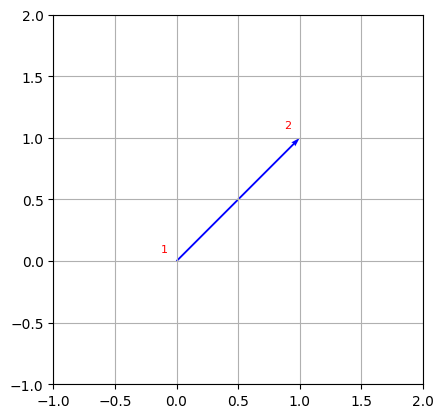

In [601]:
for edge in edge_store:
    print(f"Edge: {edge.Name}")
    edge.Org().debug()
    edge.Dest().debug()
annotate_data = {"1": (0,0),"2":(1,1)}
draw_edges(edge_store,annotate_data=annotate_data,x_limit=[-1,2],y_limit=[-1,2])

In [602]:
# Test with 3
S = [Site(0,0),Site(1,1),Site(1,0)]
sorted_S = prepare_data(S)
edge_store = []
e1,e2 = delaunay_dc(sorted_S, edge_store)

(x,y): (0,0)
(x,y): (1,0)
(x,y): (1,1)
\Make_Edge - create edge: 5 
\Make_Edge - create edge: 9 

---BEGIN SPLICE---
\Connect - will create edge: 13 
\Make_Edge - create edge: 13 

---BEGIN SPLICE---

---BEGIN SPLICE---


Edge: 5
(x,y): (0,0)
(x,y): (1,0)
Edge: 9
(x,y): (1,0)
(x,y): (1,1)
Edge: 13
(x,y): (1,1)
(x,y): (0,0)


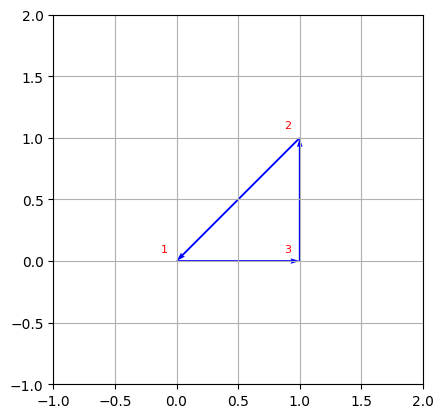

In [603]:
for edge in edge_store:
    print(f"Edge: {edge.Name}")
    edge.Org().debug()
    edge.Dest().debug()
annotate_data = {"1": (0,0),"2":(1,1),"3":(1,0)}
draw_edges(edge_store,annotate_data=annotate_data,x_limit=(-1,2),y_limit=(-1,2))

In [604]:
for s in sorted_S:
    s.debug()

(x,y): (0,0)
(x,y): (1,0)
(x,y): (1,1)


In [605]:
# Test with 4
QuadEdge.name_id = 0
edge_store = []
S = [Site(0,0),Site(1,1),Site(1,0),Site(0,1)]
sorted_S = prepare_data(S)
delaunay_dc(sorted_S,edge_store)

(x,y): (0,0)
(x,y): (0,1)
(x,y): (1,0)
(x,y): (1,1)
\Make_Edge - create edge: 0 
\Make_Edge - create edge: 4 
ldi:
(x,y): (0,0)
ldi: None
(x,y): (1,0)
rdi: None
Finish compute the lower common tangent of L and R
\Connect - will create edge: 8 
\Make_Edge - create edge: 8 

---BEGIN SPLICE---

---BEGIN SPLICE---
add cross edge basel from basel.Org to lcand.Dest
\Connect - will create edge: 12 
\Make_Edge - create edge: 12 

---BEGIN SPLICE---

---BEGIN SPLICE---
Both lcand and rcand are invalid


(<__main__.QuadEdge at 0x122cde3d0>, <__main__.QuadEdge at 0x122bec050>)

Edge: 0
(x,y): (0,0)
(x,y): (0,1)
Edge: 4
(x,y): (1,0)
(x,y): (1,1)
Edge: 8
(x,y): (1,1)
(x,y): (0,0)
Edge: 12
(x,y): (0,0)
(x,y): (0,0)


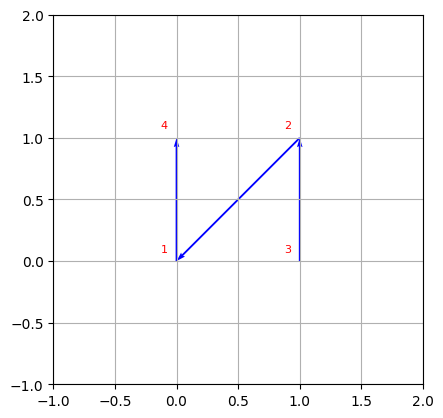

In [606]:
for edge in edge_store:
    print(f"Edge: {edge.Name}")
    edge.Org().debug()
    edge.Dest().debug()

annotate_data = {"1": (0,0),"2":(1,1),"3":(1,0), "4": (0,1)}
draw_edges(edge_store,annotate_data=annotate_data,x_limit=(-1,2),y_limit=(-1,2))

In [607]:
# Test with 5
QuadEdge.name_id = 0
edge_store = []
S = [Site(0,0),Site(1,1),Site(1,0),Site(0,1), Site(2,4)]
sorted_S = prepare_data(S)
delaunay_dc(sorted_S,edge_store)

(x,y): (0,0)
(x,y): (0,1)
(x,y): (1,0)
(x,y): (1,1)
(x,y): (2,4)
\Make_Edge - create edge: 0 
\Make_Edge - create edge: 4 
\Make_Edge - create edge: 8 

---BEGIN SPLICE---
\Connect - will create edge: 12 
\Make_Edge - create edge: 12 

---BEGIN SPLICE---

---BEGIN SPLICE---
ldi:
(x,y): (0,0)
ldi: None
(x,y): (2,4)
rdi: None
ldi:
(x,y): (0,0)
ldi: None
(x,y): (1,1)
rdi: None
Finish compute the lower common tangent of L and R
\Connect - will create edge: 16 
\Make_Edge - create edge: 16 

---BEGIN SPLICE---

---BEGIN SPLICE---
add cross edge basel from basel.Org to lcand.Dest
\Connect - will create edge: 20 
\Make_Edge - create edge: 20 

---BEGIN SPLICE---

---BEGIN SPLICE---
Both lcand and rcand are invalid


(<__main__.QuadEdge at 0x122c9bfd0>, <__main__.QuadEdge at 0x122273d50>)

Edge: 0
(x,y): (0,0)
(x,y): (0,1)
Edge: 4
(x,y): (1,0)
(x,y): (1,1)
Edge: 8
(x,y): (1,1)
(x,y): (2,4)
Edge: 12
(x,y): (2,4)
(x,y): (1,0)
Edge: 16
(x,y): (2,4)
(x,y): (0,0)
Edge: 20
(x,y): (0,0)
(x,y): (0,0)


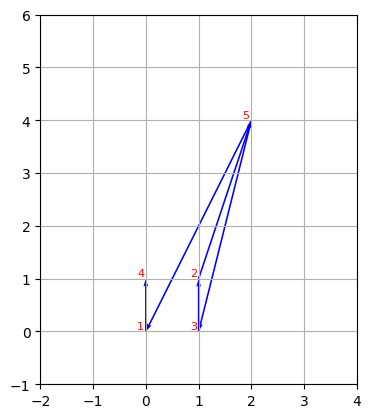

In [608]:
for edge in edge_store:
    print(f"Edge: {edge.Name}")
    edge.Org().debug()
    edge.Dest().debug()

annotate_data = {"1": (0,0),"2":(1,1),"3":(1,0), "4": (0,1), "5": (2,4)}
draw_edges(edge_store,annotate_data=annotate_data,x_limit=(-2,4),y_limit=(-1,6))